<a href="https://colab.research.google.com/github/eminshall/Predictive-Analytics/blob/main/Hotel_Data_Science_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Data Wrangling

## 1.1 Objectives


### 1.1.1 Imports

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree, metrics
import datetime
import pickle
from sklearn import __version__ as sklearn_version

import os

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 Load Data

In [58]:
import kagglehub

path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

csv_file_path = os.path.join(path, 'hotel_bookings.csv')
df = pd.read_csv(csv_file_path)

In [59]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 1.3 Explore Data

### 1.3.1 Feature of Interest

In [61]:
df = df.rename(columns={'adr':'average_daily_rate'})

In [62]:
df.sample(3).T

,49884,14376,82804
hotel,City Hotel,Resort Hotel,City Hotel
is_canceled,1,0,1
lead_time,270,244,68
arrival_date_year,2016,2017,2016
arrival_date_month,April,June,February
arrival_date_week_number,17,25,8
arrival_date_day_of_month,20,20,17
stays_in_weekend_nights,0,4,0
stays_in_week_nights,4,10,2
adults,2,2,2


In [ ]:
df[df[''] == ].T

### 1.3.2 Missing Values by Column

In [63]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


Very clean dataset, looks like I can drop company since 94 percent of the bookings are missing. I don't have enough information to say whether they are bookings direct or missing id codes. Likely any way I fill the missing values would likely influence the prediction models. Agent on the other hand I'll fill in with 0 or some other id to represent no agent was used. I think it would be safe for children and country too.

### 1.3.3 Categorical Features

In [64]:
df.select_dtypes('object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


12 categorical features I'll likely need to factorize.

#### 1.3.3.1 Unique Values

<Axes: ylabel='hotel'>

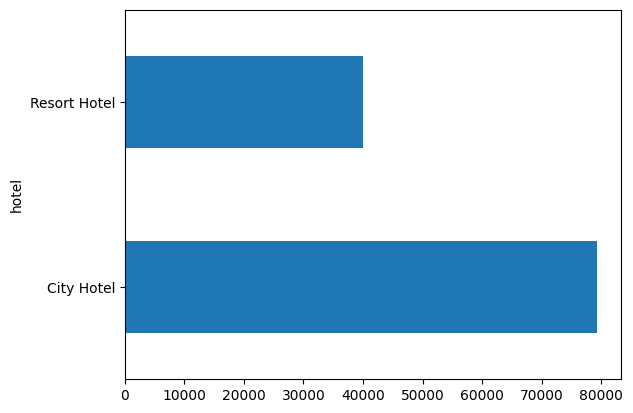

In [65]:
df['hotel'].value_counts().plot.barh()

<Axes: ylabel='meal'>

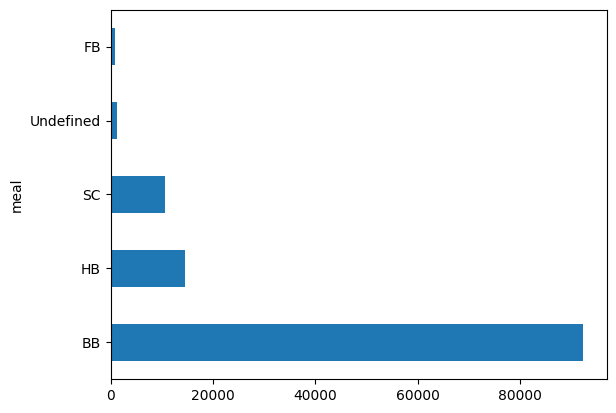

In [66]:
df['meal'].value_counts().plot.barh()

I dont know what these codes mean. BB = Breakfast Bar, HB = Hot Bar, SC = ???, FB = ???

<Axes: ylabel='market_segment'>

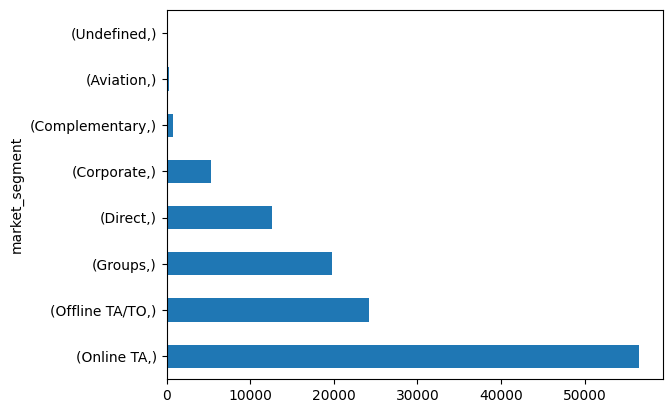

In [67]:
df[['market_segment']].value_counts().plot.barh()

<Axes: ylabel='distribution_channel'>

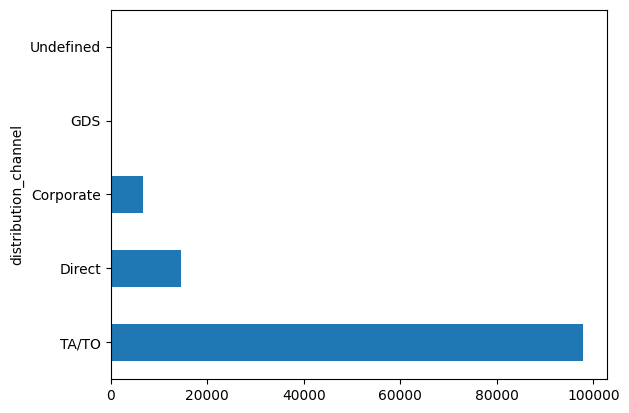

In [68]:
df['distribution_channel'].value_counts().plot.barh()

<Axes: ylabel='customer_type'>

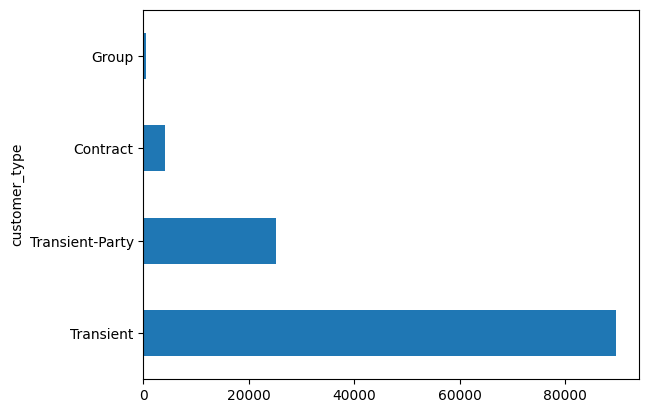

In [69]:
df['customer_type'].value_counts().plot.barh()

I didn't even think to consider 'shared room' as an option.

<Axes: ylabel='reservation_status'>

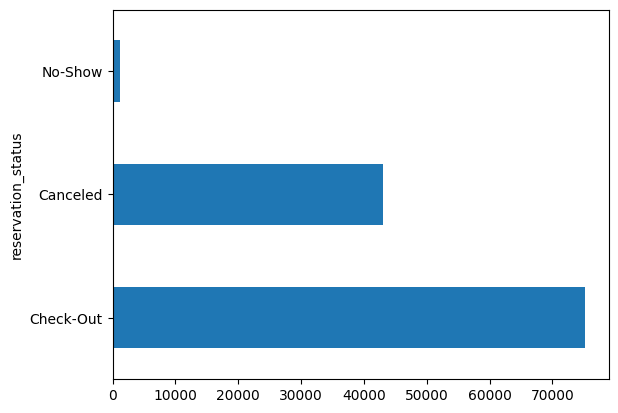

In [70]:
df['reservation_status'].value_counts().plot.barh()

#### 1.3.3.2 Distinct Values

In [71]:
df.select_dtypes('object').nunique()

,0
hotel,2
arrival_date_month,12
meal,5
country,177
market_segment,8
distribution_channel,5
reserved_room_type,10
assigned_room_type,12
deposit_type,3
customer_type,4


#### 1.3.3.3 Distribution of Values

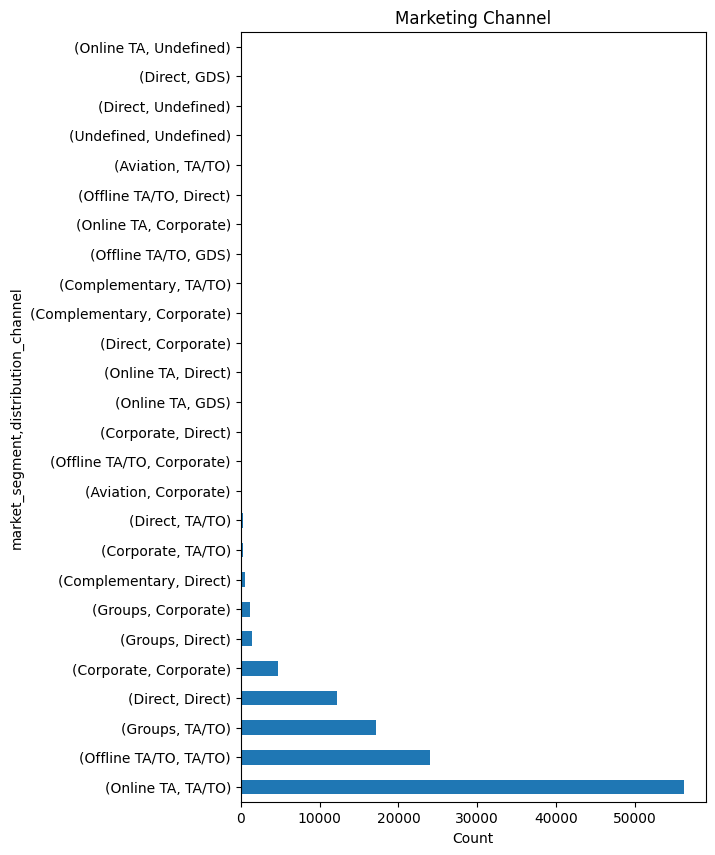

In [72]:
df[['market_segment','distribution_channel']].value_counts().plot(kind='barh', figsize=(6, 10), title='Marketing Channel')
plt.xlabel('Count')

plt.subplots_adjust(wspace=0.5);

Not anything mind blowing here based on what the value counts were above, but this is a visual display of the top 100 neighborhoods by distribution.

#### 1.3.3.4 Distribution of Values to Target Variable

##### 1.3.3.4.1 Average Price to Category Feature

In [73]:
target_means = df.groupby(['hotel','arrival_date_month','customer_type'])['average_daily_rate'].mean()
target_means.head()

hotel       arrival_date_month  customer_type  
City Hotel  April               Contract            94.606538
                                Group               81.700000
                                Transient          114.498348
                                Transient-Party     95.447582
            August              Contract            86.159748
Name: average_daily_rate, dtype: float64

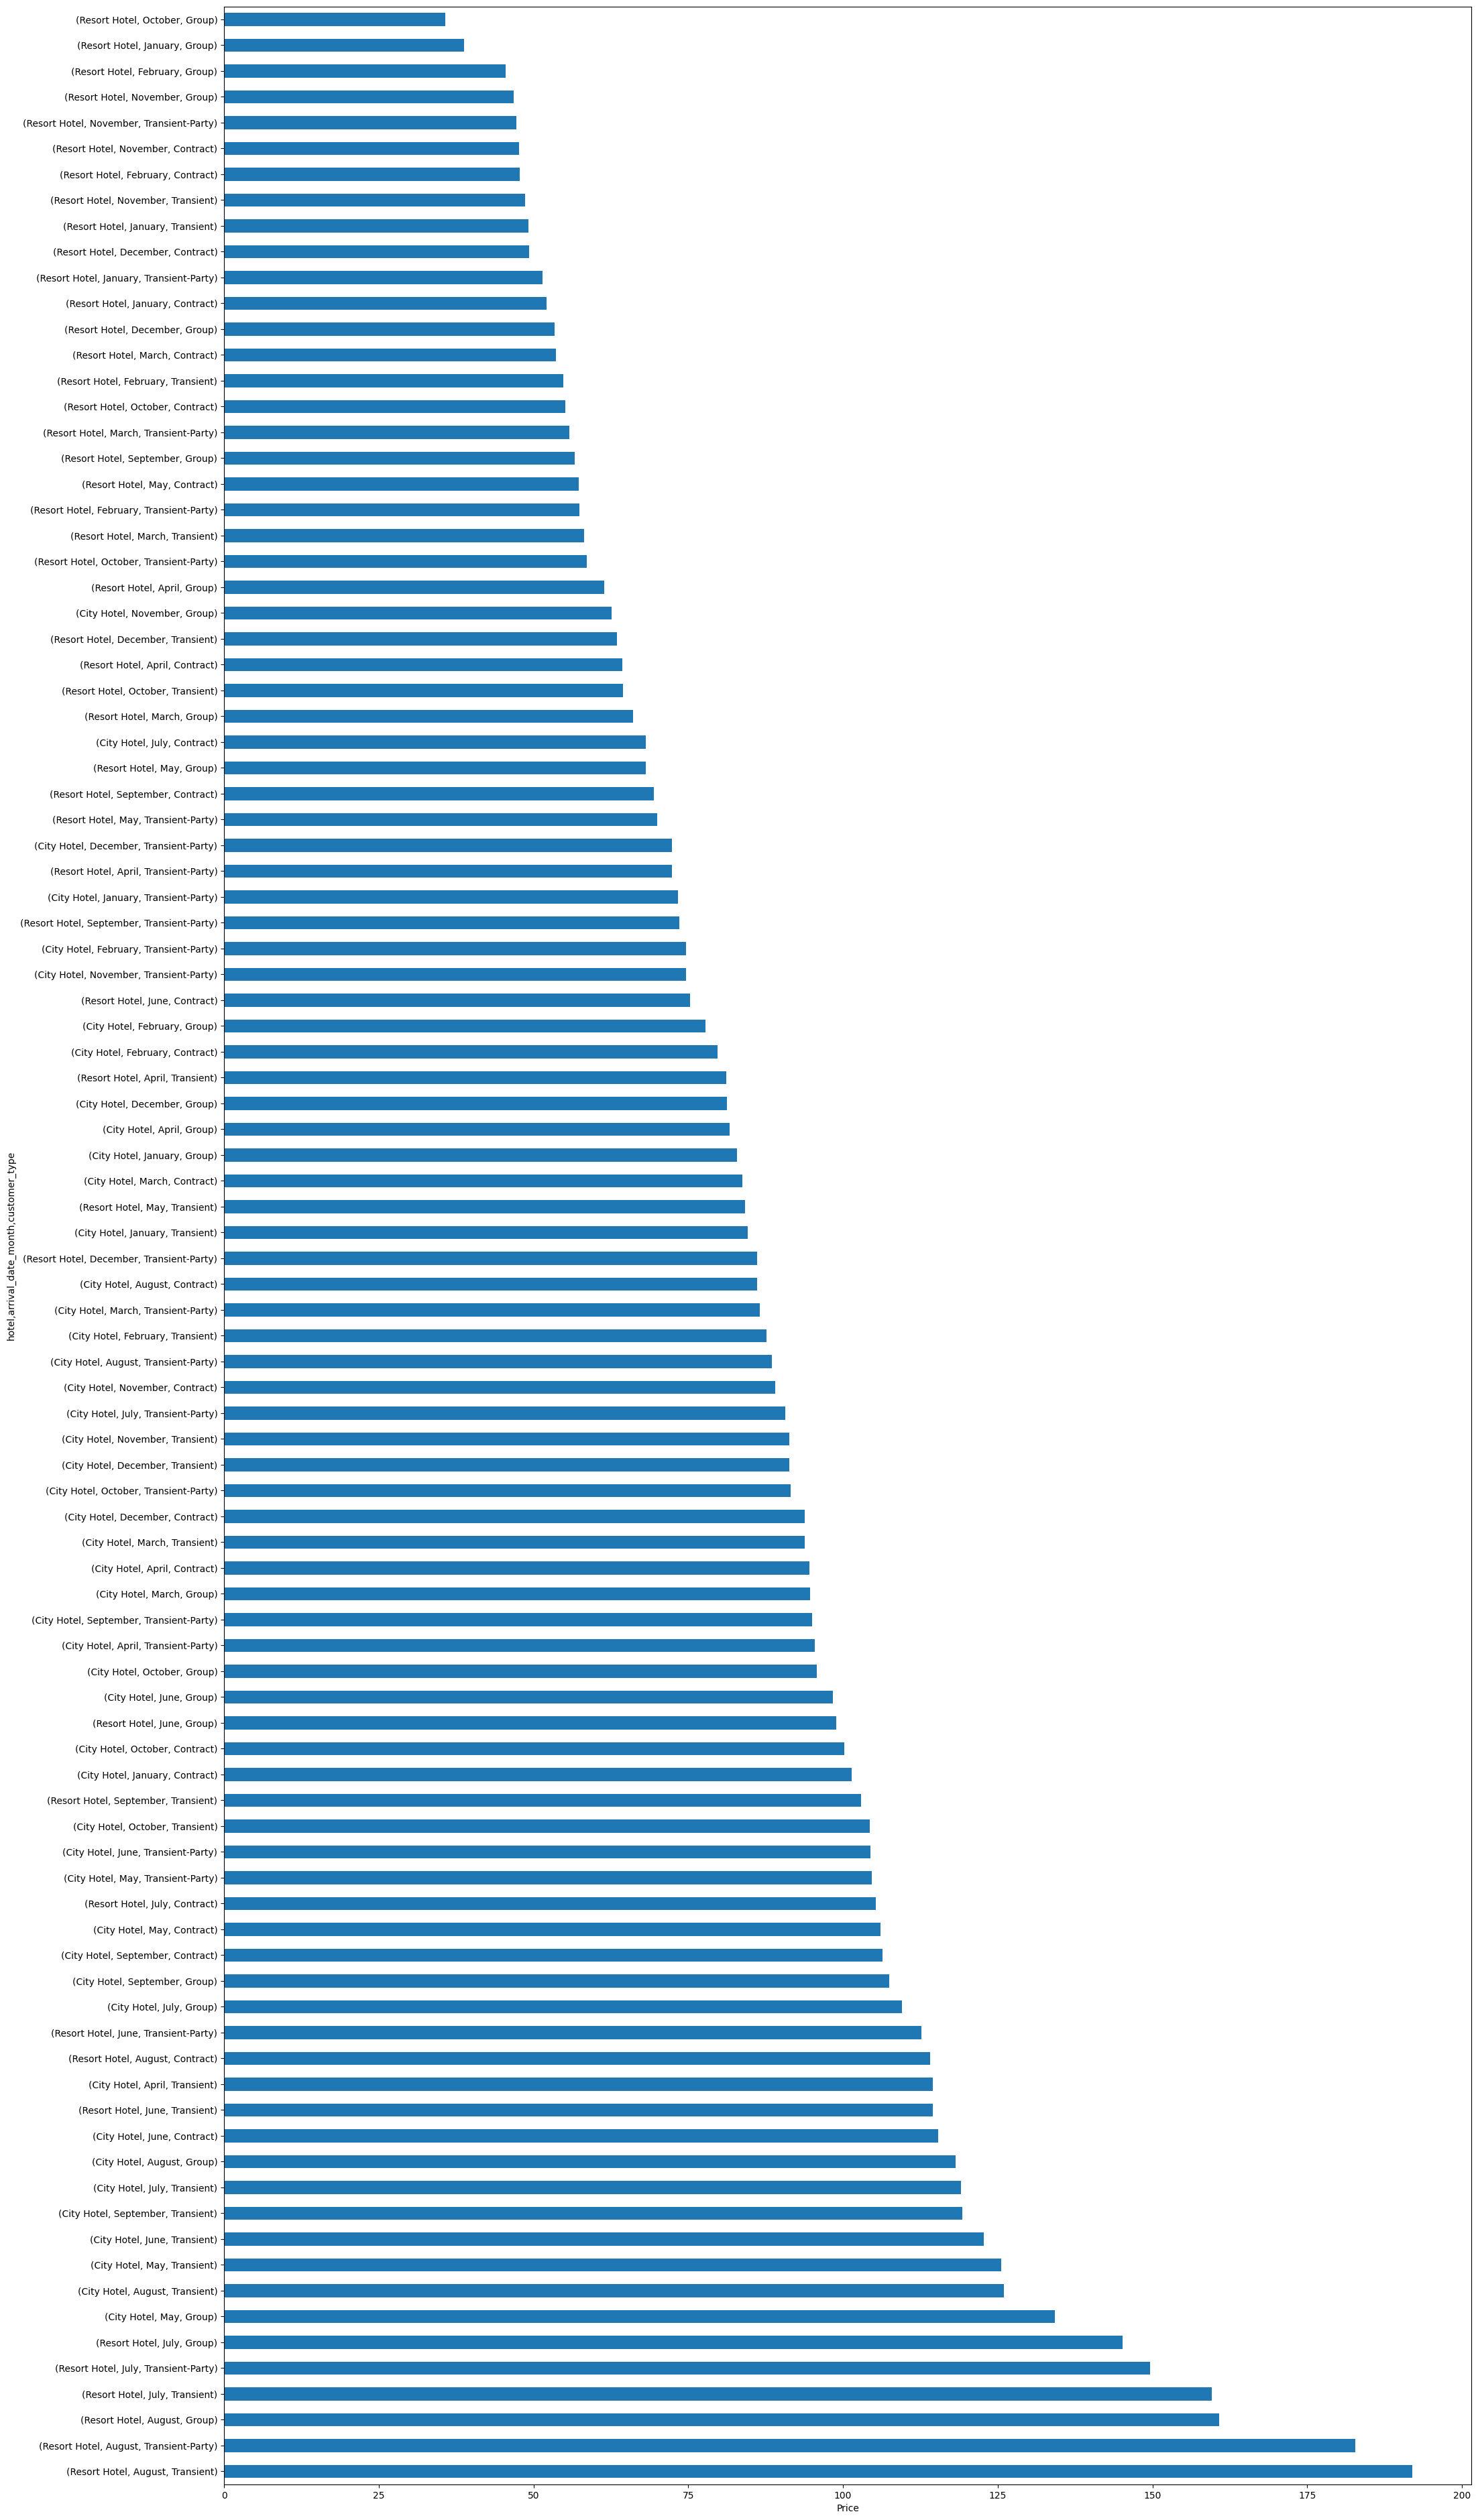

In [74]:
target_means_sorted = target_means.sort_values(ascending=False)

target_means_sorted.plot(kind='barh', figsize=(24, 48))
plt.xlabel('Price');

I guess it's not that big of a surprise the summer and spring months tend to have greater average daily rates for generally most customer types. The graph is a little difficult to read, but the data frame is likely very insightful.

##### 1.3.3.4.2 Distribution of Price by Category Feature

### 1.3.4 Numeric Features

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### 1.3.4.1 Distribution of Feature Values

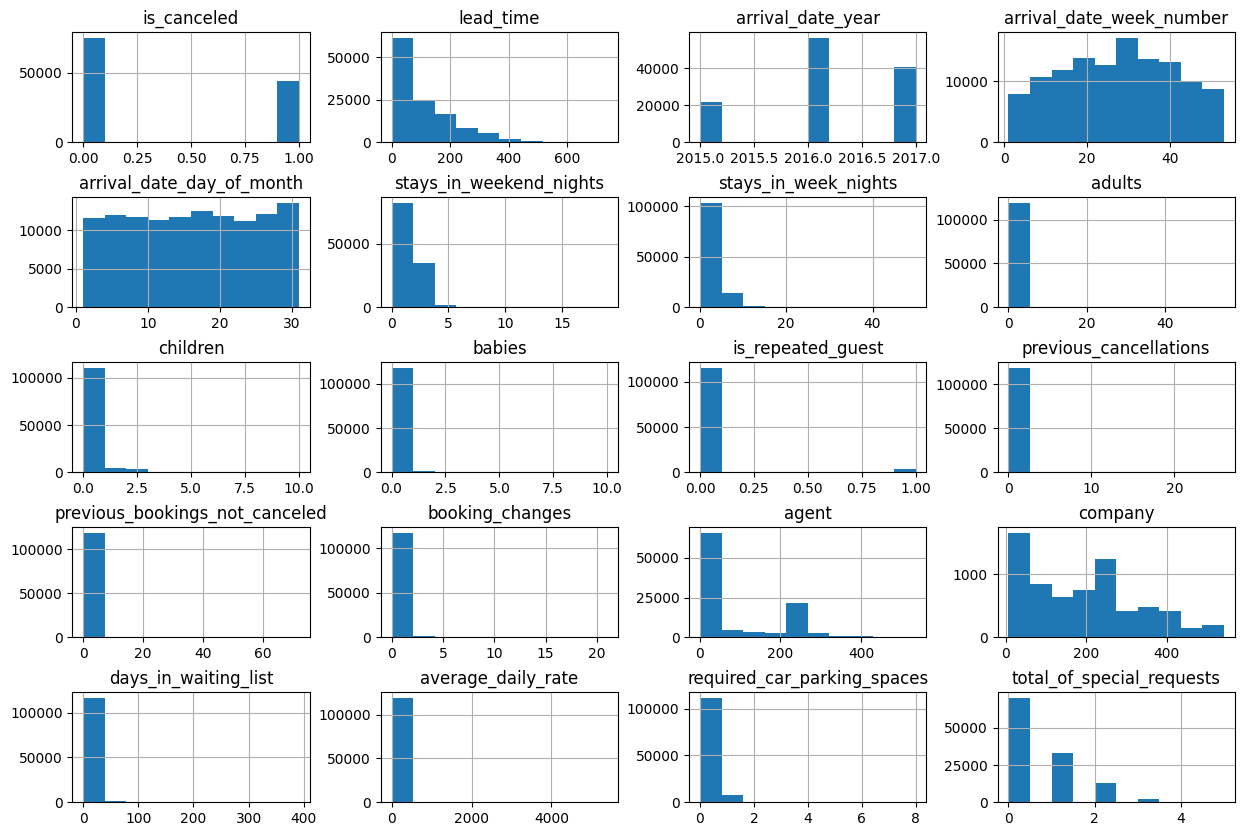

In [76]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

## 1.4 Drop Rows Missing Target Feature

In [77]:
missing_price = df[['is_canceled']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

,count
0,100.0


There are no rows missing the target feature. My main concern with this classification is whether or not the target feature is balanced enough.

In [ ]:
df[['W']].isnull().sum()

In [ ]:
df = df[missing_price != ]

## 1.6 Exogeneous Data & Feature Engineering

I'm not sure if I need feature engineering, but I do know I'll need to factorize quite a few columns

### Feature Engineering

In [78]:
df.select_dtypes('object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [79]:
df['hotel_encoded'] = pd.factorize(df['hotel'])[0]
df['meal_encoded'] = pd.factorize(df['meal'])[0]
df['country_encoded'] = pd.factorize(df['country'])[0]
df['market_segment_encoded'] = pd.factorize(df['market_segment'])[0]
df['distribution_channel_encoded'] = pd.factorize(df['distribution_channel'])[0]
df['reserved_room_type_encoded'] = pd.factorize(df['reserved_room_type'])[0]
df['assigned_room_type_encoded'] = pd.factorize(df['assigned_room_type'])[0]
df['customer_type_encoded'] = pd.factorize(df['customer_type'])[0]
df['reservation_status_encoded'] = pd.factorize(df['reservation_status'])[0]
df['deposit_type_encoded'] = pd.factorize(df['deposit_type'])[0]

In [82]:
df.sample(3).T

,102032,74546,10897
hotel,City Hotel,City Hotel,Resort Hotel
is_canceled,0,1,1
lead_time,80,339,124
arrival_date_year,2016,2015,2017
arrival_date_month,November,September,April
arrival_date_week_number,47,39,15
arrival_date_day_of_month,19,21,9
stays_in_weekend_nights,2,1,2
stays_in_week_nights,1,1,5
adults,2,2,2


In [ ]:
url = ''
df2 = pd.read_html(url)

In [ ]:
type(df2)

In [ ]:
len(df2)

In [ ]:
df2 = df2[0]
df2.head()

## 1.5 Review Distributions

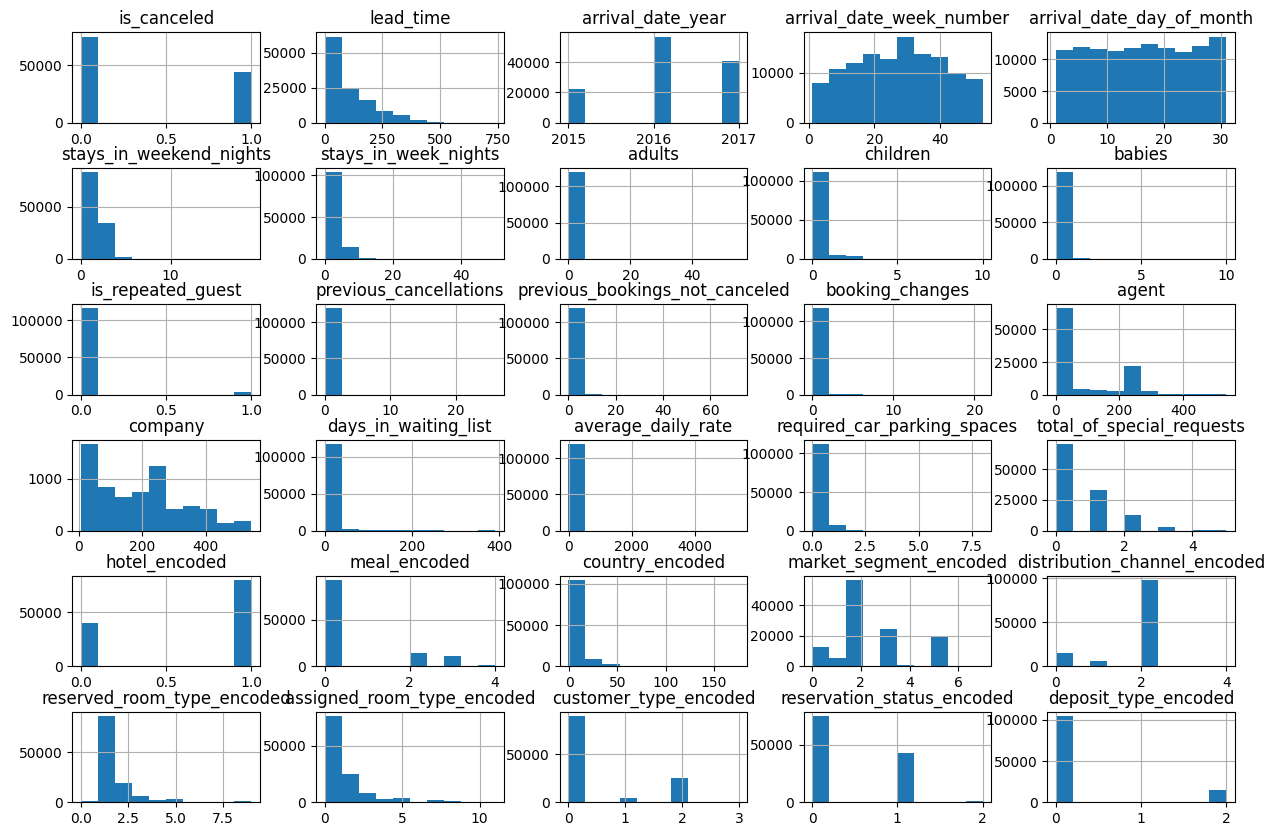

In [83]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

Thankfully there doesn't seem to be anything too crazy in terms of outliers here.

## 1.7 Target Feature

In [ ]:
df.plot(x='is_canceled', y='average_daily_rate', kind='scatter');

In [ ]:
df.loc[df[''] == '', ['Target1', 'Target2']]

In [ ]:
df[['', '']].isnull().sum()

In [ ]:
df[''].fillna(0, inplace=True)
df[''].fillna('N/A', inplace=True)

In [ ]:
df.drop(columns=[''], inplace=True)
#df.dropna(subset=[''], inplace=True)

In [ ]:
df.shape

In [ ]:
df.info()

### 1.7.1 Number of Missing Values by Row

In [ ]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

In [ ]:
missing['%'].unique()

In [ ]:
missing['%'].value_counts()

## 1.8 Save Data

In [85]:
import os
import pickle

def save_file(data, filename, datapath):
    """Saves data to a file in the specified directory, supporting CSV and pickle formats."""
    if not os.path.exists(datapath):
        os.makedirs(datapath)
    file_path = os.path.join(datapath, filename)

    if filename.endswith('.csv'):
        data.to_csv(file_path, index=False)
        print(f"DataFrame saved to {file_path}")
    elif filename.endswith('.pkl'):
        with open(file_path, 'wb') as f:
            pickle.dump(data, f)
        print(f"Model saved to {file_path}")
    else:
        print(f"Unsupported file format for {filename}")

In [86]:
datapath = '/content/drive/MyDrive/Data'

save_file(df, 'hotel_cleaned.csv', datapath)

DataFrame saved to /content/drive/MyDrive/Data/hotel_cleaned.csv


In [ ]:
datapath = '../data'
save_file(df2, 'df2.csv', datapath)

# 2.0 Exploratory Data Analysis

## Univariate Analysis

In [87]:
def plot_compare(feat_name, description, id, conf=None, figsize=(10, 5)):
    """Graphically compare distributions of features.

    Plot histogram of values for all resorts and reference line to mark
    Boise State's position.

    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    conf - select a specific conference (None for all conferences)
    figsize - (optional) figure size
    """
    boise_st = df[df['host_id'] == id]

    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    if conf is None:
        ski_x = df[feat_name]
    else:
        ski_x = df.loc[df['neighbourhood_group'] == conf, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins=30)
    # Calculate the mean value for Boise State to plot a single vertical line
    boise_st_mean_feat = boise_st[feat_name].mean()
    plt.axvline(x=boise_st_mean_feat, c='r', ls='--', alpha=0.8, label=f'host {id}')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for Neighborhood')
    plt.legend()

## Bi-variate Analysis

In [ ]:
def plot_scatter_by_filters(df, x_col, y_col, conf=None, year=None, xlabel=None, ylabel=None, title=None):
    """
    Generates a scatter plot of two numeric columns, with optional filtering by conference and year.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The name of the column for the x-axis.
        y_col (str): The name of the column for the y-axis.
        conf (str, optional): The conference to filter by. Defaults to None (plot all conferences).
        year (int, optional): The year to filter by. Defaults to None (plot all years).
        xlabel (str, optional): The label for the x-axis. Defaults to the x_col name.
        ylabel (str, optional): The label for the y-axis. Defaults to the y_col name.
        title (str, optional): The title of the plot. Defaults to a generated title.
    """
    df_filtered = df.copy()

    if conf:
        df_filtered = df_filtered[df_filtered['CONF'] == conf]
        if df_filtered.empty:
            print(f"No data found for conference: {conf}")
            return

    if year:
        df_filtered = df_filtered[df_filtered['YEAR'] == year]
        if df_filtered.empty:
            print(f"No data found for year: {year}")
            return

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_filtered, x=x_col, y=y_col)

    if xlabel is None:
        xlabel = x_col
    if ylabel is None:
        ylabel = y_col
    if title is None:
        title = f'{y_col} vs {x_col}'
        if conf and year:
            title += f' for {conf} Conference in {year}'
        elif conf:
            title += f' for {conf} Conference'
        elif year:
            title += f' in {year}'

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
plot_scatter_by_filters(df, 'price', 'minimum_nights', conf=None, year=None, xlabel=None, ylabel=None, title=None)

In [ ]:
plot_scatter_by_filters(df, 'price', 'number_of_reviews', conf=None, year=None, xlabel=None, ylabel=None, title=None)

In [ ]:
plot_scatter_by_filters(df, 'price', 'reviews_per_month', conf=None, year=None, xlabel=None, ylabel=None, title=None)

In [ ]:
plot_scatter_by_filters(df, 'price', 'calculated_host_listings_count', conf=None, year=None, xlabel=None, ylabel=None, title=None)

In [ ]:
plot_scatter_by_filters(df, 'price', 'availability_365', conf=None, year=None, xlabel=None, ylabel=None, title=None)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = df.copy()

df_copy['price_log'] = np.log1p(df['price'])

plt.figure(figsize=(12, 8))
sns.violinplot(x='neighbourhood_group', y='price_log',hue='room_type', data=df_copy)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price_log')
plt.title('Distribution of Price by Neighbourhood Group')
plt.show()

The data exploration is not yielding very interesting results in my opinion. There doesn't seem to be a very strong linear relationship to price and the other floating numeric features. Even something one would expect higher prices like number of reveiws etc. However on second thought those reveiws could be good or bad. We don't really know with this dataset.

The outliers on price also greatly skew the normalization of the prices. Meaning the histograms don't provide much information other than that there exists huge outliers in each feature.

The violin plot seems to be the only real insightful graph where we can see large clusters around a market determined price in each borough and room type while still capture how long the tails exist away from the highest concentration of price points.

### Timeseries Analysis

In [ ]:
def plot_team_performance_over_years(df, y_col, conf=None, ylabel=None, highlight_team=None):
    """
    Generates a line plot showing a numeric performance metric over the years for each team,
    optionally filtered by conference, and highlights a specific team.

    Args:
        df (pd.DataFrame): The input DataFrame with 'TEAM', 'YEAR', and the specified y_col.
        y_col (str): The name of the numeric column to plot on the y-axis.
        conf (str, optional): The conference to filter by. Defaults to None (plot all teams).
        ylabel (str, optional): The label for the y-axis. Defaults to the y_col name.
        highlight_team (str, optional): The name of the team to highlight. Defaults to None.
    """
    plt.figure(figsize=(15, 8))

    if conf:
        df_filtered = df[df['CONF'] == conf].copy()
        if df_filtered.empty:
            print(f"No teams found for conference: {conf}")
            return
        teams = df_filtered['TEAM'].unique()
        plt.title(f'{y_col} Over Years for Teams in {conf} Conference')
    else:
        df_filtered = df.copy()
        teams = df_filtered['TEAM'].unique()
        plt.title(f'{y_col} Over Years for Each Team')

    if ylabel is None:
        ylabel = y_col

    for team in teams:
        team_data = df_filtered[df_filtered['TEAM'] == team].sort_values(by='YEAR')
        if team == highlight_team:
            plt.plot(team_data['YEAR'], team_data[y_col], marker='o', linestyle='-', label=team, color='red', linewidth=2)
        else:
            plt.plot(team_data['YEAR'], team_data[y_col], marker='o', linestyle='-', label=team if len(teams) < 20 else "_nolegend_", alpha=0.5) # Add label for legend if not too many teams


    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.grid(True)

    # Add legend only if there are not too many teams or a team is highlighted
    if len(teams) < 20 or highlight_team:
        plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

## Multi-Variate Analysis

In [92]:
columns = df.select_dtypes(['int64','float64']).columns.to_list()
team_avg_win = df.groupby('is_canceled')[columns].mean()
team_avg_win.head()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,hotel_encoded,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,reserved_room_type_encoded,assigned_room_type_encoded,customer_type_encoded,reservation_status_encoded,deposit_type_encoded
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,0.0,79.984687,2016.147514,27.080143,15.839529,0.928971,2.464053,1.829737,0.102347,0.010377,...,0.615012,0.570231,8.500186,2.207807,1.613309,1.553202,1.837014,0.556608,0.000000,0.004151
1,1.0,144.848815,2016.171920,27.309696,15.728066,0.925267,2.561912,1.901728,0.106513,0.003821,...,0.748508,0.531114,5.533692,2.909099,1.852795,1.445369,1.474380,0.321477,1.027293,0.656295


In [93]:
team_avg_win_index = team_avg_win.index

team_avg_win_columns = team_avg_win.columns
team_avg_win_scale = team_avg_win.copy()

team_avg_win_scale = scale(team_avg_win_scale)

team_avg_win_scale = pd.DataFrame(team_avg_win_scale, columns=team_avg_win_columns, index=team_avg_win_index)
team_avg_win_scale.std(ddof=0)

,0
is_canceled,1.0
lead_time,1.0
arrival_date_year,1.0
arrival_date_week_number,1.0
arrival_date_day_of_month,1.0
stays_in_weekend_nights,1.0
stays_in_week_nights,1.0
adults,1.0
children,1.0
babies,1.0


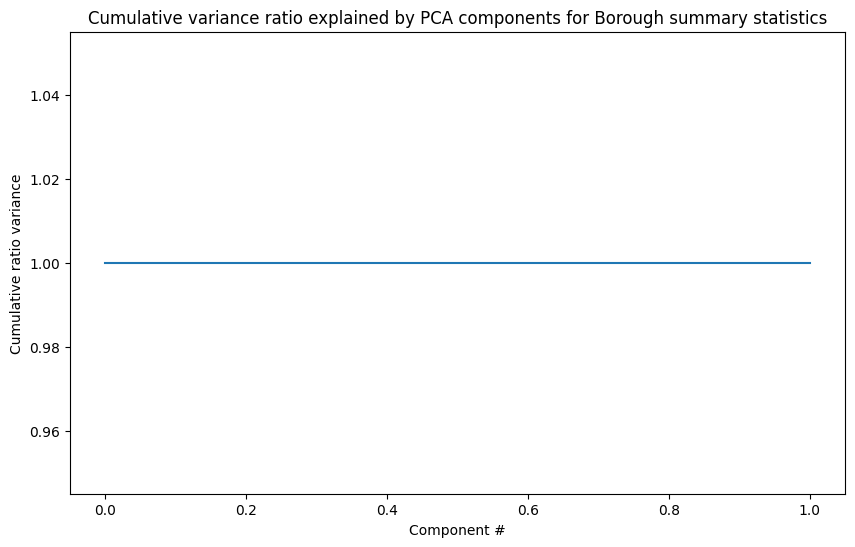

In [94]:
team_pca = PCA().fit(team_avg_win_scale)

plt.subplots(figsize=(10, 6))
plt.plot(team_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Borough summary statistics');

In [95]:
team_pca_x = team_pca.transform(team_avg_win_scale)
team_pca_x.shape

(2, 2)

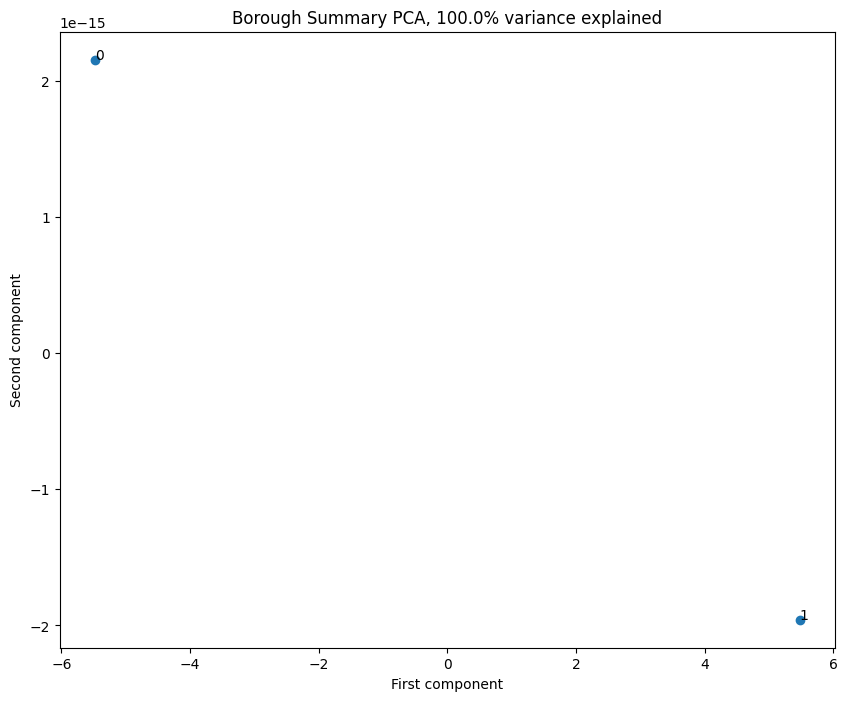

In [96]:
x = team_pca_x[:, 0]
y = team_pca_x[:, 1]
state = team_avg_win_index
pc_var = 100 * team_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Borough Summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))


Very interesting that Brooklyn and Manhattan are so far apart. Sadly, Staten Island is negatively impacted by both components. I'm curious what the PCA might be if we grouped by a more granular or room type.

In [ ]:
columns = df.select_dtypes(['int64','float64']).columns.to_list()
team_avg_win = df.groupby(['neighbourhood_group','room_type'])[columns].mean().fillna(0)
team_avg_win.head()

team_avg_win_index = team_avg_win.index

team_avg_win_columns = team_avg_win.columns
team_avg_win_scale = team_avg_win.copy()

team_avg_win_scale = scale(team_avg_win_scale)

team_avg_win_scale = pd.DataFrame(team_avg_win_scale, columns=team_avg_win_columns, index=team_avg_win_index)
team_avg_win_scale.std(ddof=0)

team_pca = PCA().fit(team_avg_win_scale)

plt.subplots(figsize=(10, 6))
plt.plot(team_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Room Type summary statistics');

team_pca_x = team_pca.transform(team_avg_win_scale)
team_pca_x.shape

x = team_pca_x[:, 0]
y = team_pca_x[:, 1]
state = team_avg_win_index
pc_var = 100 * team_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Room Type Summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

Adding in room type makes the PCA analysis a little more interesting. As there is more variety among the data if room_type is considered in the average analysis. I tried looking at neighbourhoods as well too, but unfortuantely because there are so many neighbourhoods the visual doesn't provide much insight on the data.

### Feature Correlation

In [ ]:
corr = df.select_dtypes(['int64','float64']).corr()

plt.figure(figsize=(12,12), facecolor='w')
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title('Feature Correlation Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

# 3.0 Preprocessing & Training

## 3.1 Imports

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor # Import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import datetime
import pickle
from sklearn import __version__ as sklearn_version

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/airbnb_cleaned.csv')

## 3.2 Train Test Split

In [ ]:
boise_st = df[df.host_id == 163035332]
boise_st.T

In [ ]:
df = df[df.host_id != 163035332]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='is_canceled'),
                                                    df['is_canceled'], test_size=0.3,
                                                    random_state=47)

In [101]:
X_train.shape, X_test.shape

((83573, 41), (35817, 41))

In [102]:
names_list = df.select_dtypes('object').columns.to_list()
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((83573, 29), (35817, 29))

In [103]:
y_train.shape, y_test.shape

((83573,), (35817,))

## 3.3 Not-Even-A-Model
The goal of not-even-a-model is to establish a baseline. Meaning our model is only useful if it can perform better than simply calculating the average.

In [104]:
train_mean = y_train.mean()
train_mean

np.float64(0.36910246132124014)

In [105]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[0.36910246]])

In [106]:
y_pred_dumb = dumb_reg.predict(X_train)
y_pred_dumb[:5]

array([0.36910246, 0.36910246, 0.36910246, 0.36910246, 0.36910246])

In [107]:
y_tr_pred_ = train_mean * np.ones(len(y_train))

In [108]:
y_te_pred = train_mean * np.ones(len(y_test))

## 3.4 Metrics

### 3.4.1 R-squared

In [109]:
r2_score(y_train, y_pred_dumb), r2_score(y_test, y_te_pred)

(0.0, -8.19647314977967e-05)

### 3.4.2 Mean Absolute Error

In [110]:
mean_absolute_error(y_train, y_pred_dumb), mean_absolute_error(y_test, y_te_pred)

(0.46573166873568517, 0.4668781753623811)

### 3.4.3 Mean Squared Error

In [111]:
mean_squared_error(y_train, y_pred_dumb), mean_squared_error(y_test, y_te_pred)

(0.2328658343678425, 0.23401234099453838)

## 3.5 Initial Models

### Regression Models

In [112]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Linear Regression
lr_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

# Lasso Regression
lasso_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    Lasso()
)

# Ridge Regression
ridge_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    Ridge()
)

# Fitting models on Training data
lr_pipe.fit(X_train, y_train)
lasso_pipe.fit(X_train, y_train)
ridge_pipe.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr_pipe.predict(X_test)
y_pred_lasso = lasso_pipe.predict(X_test)
y_pred_ridge = ridge_pipe.predict(X_test)

Text(0.5, 0.98, 'True vs Predicted')

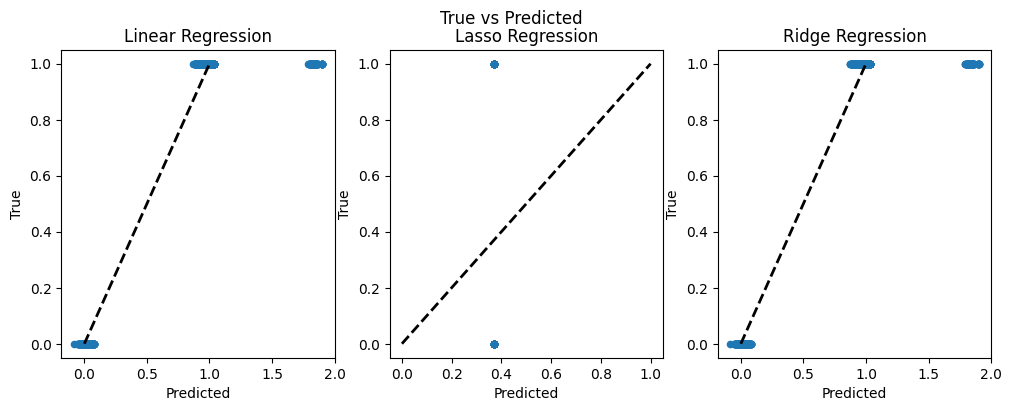

In [113]:
#Plot the Regression Models

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4), facecolor='w')

#plot linear regression
ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

#plot lasso regression
ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

#plot ridge regression
ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")

Unsurprisingly, the classic regression models perform pretty badly as the numeric values do not seem to provide much linear correspondence to the price during our exploratory evaluation of the data. We can also note that the high level of outliers in this data make classic linear models to perform less effectively.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    DecisionTreeRegressor()
)

dtr_pipe.fit(X_train, y_train)

y_pred_dtr = dtr_pipe.predict(X_test)

In [ ]:
#plot Decision Tree Regressor
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

Visually, we can see the model struggles to predict airbnb listings with outlier pricing.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(f_regression),
    RandomForestRegressor()
)

rfr_pipe.fit(X_train, y_train)

y_pred_rfr = rfr_pipe.predict(X_test)

In [ ]:
#plot Random Forest Regressor
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

I'm really disappointed with these numbers to begin with because it shows the models really struggle to accurately predict the pricing for these. We've seen the correlation matrix to show the features don't correlate well to price and we can see too the outliers would pose a problem as well. I thought the tree regressors however would be able to compensate.

#### Hyperparamter Tuning

In [ ]:
k = [k+1 for k in range(len(X_train.columns))]
n_est = [int(n) for n in np.logspace(start=1, stop=2, num=7)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median'],
        'selectkbest__k': k
}

In [ ]:
rfr_grid_cv = GridSearchCV(rfr_pipe, param_grid=grid_params, verbose=1, cv=3, n_jobs=-1)

In [ ]:
rfr_grid_cv.fit(X_train, y_train)

In [ ]:
rfr_grid_cv.best_params_

In [ ]:
score_mean = rfr_grid_cv.cv_results_['mean_test_score']
score_std = rfr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in rfr_grid_cv.cv_results_['param_selectkbest__k']]

In [ ]:
best_k = rfr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [ ]:
rf_neg_mae = cross_validate(rfr_grid_cv.best_estimator_, X_train, y_train,
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [ ]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

In [ ]:
print("""Grid Cross Validation Regressor \t {:.2f}""".format(
            mean_absolute_error(y_test, rfr_grid_cv.best_estimator_.predict(X_test))))

#### Feature Importance

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rfr_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_

# Get the names of the features selected by SelectKBest
selected_features_mask = rfr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
selected_feature_names = X_train.columns[selected_features_mask]

rf_feat_imps = pd.Series(imps, index=selected_feature_names).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

### Classification Models

In [116]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(),
    RandomForestClassifier()
)

rfc_pipe.fit(X_train, y_train)

y_pred_rfc = rfr_pipe.predict(X_test)

y_pred_rfc = pd.Series(y_pred_rfc, index=y_test.index)

In [119]:
print("Random Forest model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_rfc))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_rfc))
print('Precision score' , metrics.precision_score(y_test,y_pred_rfc, pos_label = 0))
print('Recall score' , metrics.recall_score(y_test,y_pred_rfc, pos_label = 1))

Random Forest model - max depth 3
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score 1.0
Recall score 1.0


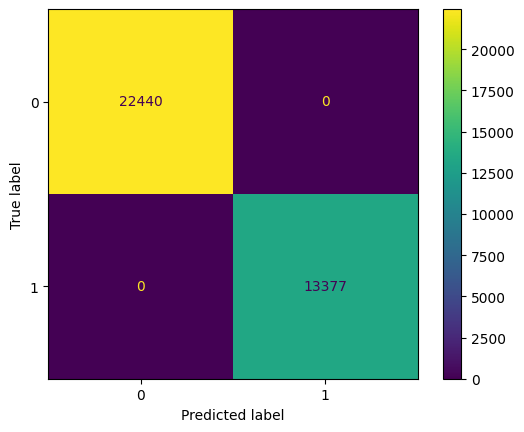

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Only works with Classification Models
# Use ConfusionMatrixDisplay.from_estimator to plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(rfc_pipe, X_test, y_test)
plt.show()

## Final Model Selection

In [ ]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(rfr_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
best_model = rfr_grid_cv.best_estimator_
best_model.version = 2.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [ ]:
modelpath = '/content/drive/MyDrive/Models'
save_file(best_model, 'cbb_model_2.pkl', modelpath)

# 4.0 Modeling Checkpoint

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/cleaned.csv')

## Load Model

In [ ]:
expected_model_version = '1.0'
model_path = '/content/drive/MyDrive/Models/cbb_model_2.pkl' # Corrected path
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
else:
    print("Expected model not found")

In [ ]:
model.version

## Refit Model

In [ ]:
X = df.loc[df.TEAM != "Boise St.", model.X_columns][10:]
y = df.loc[df.TEAM != "Boise St.", 'W'][10:]

len(X), len(y)

In [ ]:
model.fit(X, y)

In [ ]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

## Calculate Expected Target Variable from Model

In [ ]:
X_bm = df.loc[df.TEAM == "Boise St.", model.X_columns][10:]
y_bm = df.loc[df.TEAM == "Boise St.", 'W'][10:]

bm_pred = model.predict(X_bm).item()

y_bm = y_bm.values.item()

print(f'Predicted: {bm_pred:.2f}, Actual: {y_bm:.2f}.')
print(f'Mean Absolute Error: {mae_mean:.2f}')

## In Market Context

In [ ]:
def plot_compare(feat_name, description, state=None, figsize=(10, 5)):
    """Graphically compare distributions of features.

    Plot histogram of values for all resorts and reference line to mark
    Big Mountain's position.

    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    state - select a specific state (None for all states)
    figsize - (optional) figure size
    """

    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    if state is None:
        ski_x = ski_data[feat_name]
    else:
        ski_x = ski_data.loc[ski_data.state == state, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins=30)
    plt.axvline(x=big_mountain[feat_name].values, c='r', ls='--', alpha=0.8, label='Big Mountain')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for resorts in market share')
    plt.legend()

In [ ]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($)')

In [ ]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($) - Montana only', state='Montana')

In [ ]:
plot_compare('vertical_drop', 'Vertical drop (feet)')

In [ ]:
plot_compare('Snow Making_ac', 'Area covered by snow makers (acres)')

In [ ]:
plot_compare('total_chairs', 'Total number of chairs')

In [ ]:
plot_compare('fastQuads', 'Number of fast quads')

In [ ]:
plot_compare('Runs', 'Total number of runs')

In [ ]:
plot_compare('LongestRun_mi', 'Longest run length (miles)')

In [ ]:
plot_compare('trams', 'Number of trams')

In [ ]:
plot_compare('SkiableTerrain_ac', 'Skiable terrain area (acres)')

## Modeling Scenarios

In [ ]:
X_bm = df.loc[df.TEAM == "Boise St.", model.X_columns][10:]
def predict_increase(features, deltas):
    """Increase in modelled ticket price by applying delta to feature.

    Arguments:
    features - list, names of the features in the ski_data dataframe to change
    deltas - list, the amounts by which to increase the values of the features

    Outputs:
    Amount of increase in the predicted ticket price
    """

    bm2 = X_bm.copy()
    for f, d in zip(features, deltas):
        bm2[f] += d
    return model.predict(bm2).item() - model.predict(X_bm).item()


In [ ]:
game_deltas = [i for i in range(1, 11, 1)]
win_deltas = [predict_increase(['G'], [delta]) for delta in game_deltas]
#win_deltas

In [ ]:
games_played = [1 * games for games in game_deltas] #1

plt.plot(games_played, win_deltas, 'o-')
plt.xlabel('Games Played')
plt.ylabel('Wins')
plt.title('Predicted Wins per Games Played')

In [ ]:
defensive_features = ['ADJDE','EFG_D','TOR','DRB','FTRD','2P_D','3P_D','2P_D_per_G','3P_D_per_G']
offensive_features = ['ADJOE','EFG_O','TORD','ORB','FTR','2P_O','3P_O','2P_O_per_G','3P_O_per_G']
diff_features = ['EFG_diff','TOR_TORD_diff','ORB_DRB_diff','FTR_FTRD_diff','3P_diff','2P_diff']

defensive_deltas = [i for i in range(-1, -11, -1)]
offensive_deltas = [i for i in range(1, 11, 1)]
diff_deltas = [i for i in range(-5, 6, 1)]

In [ ]:
diff_deltas

In [ ]:
for feature in defensive_features:
    win_deltas = [predict_increase([feature], [delta]) for delta in defensive_deltas]

    deltas = [1 * delta for delta in defensive_deltas]

    plt.figure()
    plt.plot(deltas, win_deltas, 'o-')
    plt.xlabel(feature)
    plt.ylabel('Wins')
    plt.title(f'Predicted Wins per Additional {feature}')
    plt.show()

In [ ]:
for feature in offensive_features:
    win_deltas = [predict_increase([feature], [delta]) for delta in offensive_deltas]

    deltas = [1 * delta for delta in offensive_deltas]

    plt.figure()
    plt.plot(deltas, win_deltas, 'o-')
    plt.xlabel(feature)
    plt.ylabel('Wins')
    plt.title(f'Predicted Wins per Additional {feature}')
    plt.show()

In [ ]:
for features in diff_features:
    win_deltas = [predict_increase([features], [delta]) for delta in diff_deltas]

    deltas = [1 * delta for delta in diff_deltas]

    plt.figure()
    plt.plot(deltas, win_deltas, 'o-')
    plt.xlabel(features)
    plt.ylabel('Wins')
    plt.title(f'Predicted Wins per Additional {features}')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/NYC AirBnb Data Science for Regression.ipynb"